In [1]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications import Xception
from keras.applications import VGG16 ,VGG19
from keras.applications import MobileNetV3Small, MobileNetV3Large
from keras.applications import DenseNet201
from keras.applications import EfficientNetB7
from keras.applications import EfficientNetV2S , EfficientNetV2L
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score , f1_score , recall_score

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import keras
import tensorflow as tf

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
import pickle
from keras.applications import ResNet152V2

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications import Xception
from keras.applications import VGG16 ,VGG19
from keras.applications import MobileNetV3Small, MobileNetV3Large
from keras.applications import DenseNet201
from keras.applications import EfficientNetB7
from keras.applications import EfficientNetV2S , EfficientNetV2L
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score , f1_score , recall_score
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications import Xception
from keras.applications import VGG16 ,VGG19
from keras.applications import MobileNetV3Small, MobileNetV3Large
from keras.applications import DenseNet201
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score , f1_score , recall_score



In [3]:
# Inception ResNetV2
# Binary Classification


img_height ,img_width = (224,224)
batch_size = 32

train_data_dir = "C:/Users/ASUS/Gray_Training/Binary Classification/Training"
valid_data_dir = "C:/Users/ASUS/Gray_Training/Binary Classification/validation"
test_data_dir = "C:/Users/ASUS/Gray_Training/Binary Classification/Testing"

In [4]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split = 0)

train_generator = train_datagen.flow_from_directory(
     train_data_dir,
     target_size = (img_height,img_width),
     batch_size = batch_size,
     class_mode = 'categorical',
     subset = 'training')

#valid_generator(train_datagen.flow_from_directory(
     #valid_data_dir,
     #target_size = (img_height,img_width),
     #batch_size = batch_size,
     #class_mode = 'categorical',
     #subset = 'validation')
#)

Found 925 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1/255)

test_set = test_datagen.flow_from_directory(
            test_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'categorical')

Found 121 images belonging to 2 classes.


In [6]:
valid_datagen = ImageDataGenerator(rescale = 1/255)

valid_set = valid_datagen.flow_from_directory(
            valid_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'categorical')

Found 154 images belonging to 2 classes.


In [7]:
X, y = test_set.next()
X.shape

(1, 224, 224, 3)

In [8]:
inception_arch = InceptionResNetV2(input_shape = (img_height ,img_width , 3) , weights = 'imagenet', include_top = False)

In [9]:
for layer in inception_arch.layers:
    layer.trainable = False

In [10]:
X = inception_arch.output
X = Flatten()(X)
X = Dense(1024, 
          kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3),
          bias_regularizer=regularizers.L2(1e-2),
          activity_regularizer=regularizers.L2(1e-2),
          activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(128, 
          kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3),
          bias_regularizer=regularizers.L2(1e-2),
          activity_regularizer=regularizers.L2(1e-2),
          activation = 'relu')(X)
#X = Dense(128, activation = 'relu')(X)

#X = Dense(2048, activation = 'relu')(X)
#X = Dropout(0.2)(X)
predictions = Dense(train_set.num_classes , activation = 'softmax')(X)
model = Model(inputs = inception_arch.input , outputs = predictions)
model.summary()

#for layer in base_model.layers:
    #layer.trainable = False
    
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  
r = model.fit(train_set, validation_data = valid_set , epochs = 15)


Epoch 1/15
29/29 [==============================] - 85s 3s/step - loss: 0.5981 - accuracy: 0.8097 - val_loss: 0.3157 - val_accuracy: 0.8571
Epoch 2/15
29/29 [==============================] - 78s 3s/step - loss: 0.1686 - accuracy: 0.9330 - val_loss: 0.2615 - val_accuracy: 0.8831
Epoch 3/15
29/29 [==============================] - 79s 3s/step - loss: 0.1272 - accuracy: 0.9427 - val_loss: 0.2053 - val_accuracy: 0.9156
Epoch 4/15
29/29 [==============================] - 80s 3s/step - loss: 0.1205 - accuracy: 0.9481 - val_loss: 0.2649 - val_accuracy: 0.8831
Epoch 5/15
29/29 [==============================] - 81s 3s/step - loss: 0.0959 - accuracy: 0.9654 - val_loss: 0.2012 - val_accuracy: 0.9221
Epoch 6/15
29/29 [==============================] - 81s 3s/step - loss: 0.0886 - accuracy: 0.9622 - val_loss: 0.1218 - val_accuracy: 0.9481
Epoch 7/15
29/29 [==============================] - 82s 3s/step - loss: 0.0712 - accuracy: 0.9719 - val_loss: 0.1560 - val_accuracy: 0.9351
Epoch 8/15
29/29 [==

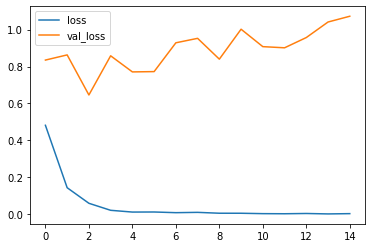

In [12]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [13]:
model.save('C:/Users/ASUS/Gray_Training/Binary Classification/first_saved_model_3.h5')

In [14]:
test_loss, test_acc = model.evaluate(test_set )
print('\nTest Accuracy:' , test_acc)

121/121 [==============================] - 12s 98ms/step - loss: 1.0725 - accuracy: 0.8595

Test Accuracy: 0.8595041036605835


1/1 [==============================] - 0s 107ms/step


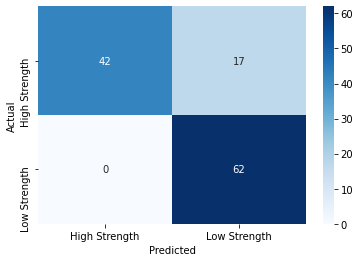

test accuracy : 85.9504132231405


In [15]:
import pandas as pd
import seaborn as sns
import tensorflow as tf

model = tf.keras.models.load_model('C:/Users/ASUS/Gray_Training/Binary Classification/first_saved_model_3.h5')
filenames  = test_set.filenames
nb_samples = len(test_set)
y_prob = []
y_act = []

test_set.reset()
for _ in range(nb_samples):
    X_test, y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(y_test)
    
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob] 
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T, columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix , cmap = 'Blues' , annot = True , fmt = 'd')
plt.show()
print('test accuracy : {}'. format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [28]:
# ternary Classification

img_height ,img_width = (224,224)
batch_size = 32

train_data_dir = "C:/Users/ASUS/Gray_Training/Ternary Classification/Training"
#valid_data_dir = "C:/Users/ASUS/Gray_Training/Binary Classification/validation"
test_data_dir = "C:/Users/ASUS/Gray_Training/Ternary Classification/Testing"

In [30]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split = 0)

train_generator = train_datagen.flow_from_directory(
     train_data_dir,
     target_size = (img_height,img_width),
     batch_size = batch_size,
     class_mode = 'categorical',
     subset = 'training')

#valid_generator(train_datagen.flow_from_directory(
     #valid_data_dir,
     #target_size = (img_height,img_width),
     #batch_size = batch_size,
     #class_mode = 'categorical',
     #subset = 'validation')
#)

Found 1409 images belonging to 3 classes.


In [31]:
test_datagen = ImageDataGenerator(rescale = 1/255)

test_set = test_datagen.flow_from_directory(
            test_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'categorical')

Found 52 images belonging to 3 classes.


In [32]:
X, y = test_set.next()
X.shape

(1, 224, 224, 3)

In [33]:
inception_arch = InceptionResNetV2(input_shape = (img_height ,img_width , 3) , weights = 'imagenet', include_top = False)

In [34]:
for layer in inception_arch.layers:
    layer.trainable = False

In [35]:
base_model = InceptionResNetV2(include_top = False, weights = 'imagenet')
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dense(1024, activation = 'relu')(X)
predictions = Dense(train_generator.num_classes , activation = 'softmax')(X)
model = Model(inputs = base_model.input , outputs = predictions)


for layer in base_model.layers:
    layer.trainable = False
    
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  
r = model.fit(train_generator, validation_data = test_set , epochs = 5)


Epoch 1/5
45/45 [==============================] - 136s 3s/step - loss: 0.6648 - accuracy: 0.7580 - val_loss: 0.7314 - val_accuracy: 0.7308
Epoch 2/5
45/45 [==============================] - 118s 3s/step - loss: 0.2537 - accuracy: 0.9013 - val_loss: 0.4392 - val_accuracy: 0.8269
Epoch 3/5
45/45 [==============================] - 117s 3s/step - loss: 0.2232 - accuracy: 0.9198 - val_loss: 0.4842 - val_accuracy: 0.8077
Epoch 4/5
45/45 [==============================] - 117s 3s/step - loss: 0.2494 - accuracy: 0.9070 - val_loss: 0.8139 - val_accuracy: 0.7500
Epoch 5/5
45/45 [==============================] - 116s 3s/step - loss: 0.1528 - accuracy: 0.9454 - val_loss: 0.1976 - val_accuracy: 0.9615


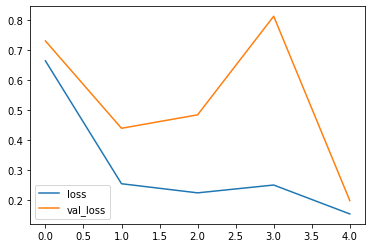

In [36]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [37]:
model.save('C:/Users/ASUS/Gray_Training/Ternary Classification/first_saved_model_2.h5')

1/1 [==============================] - 0s 134ms/step


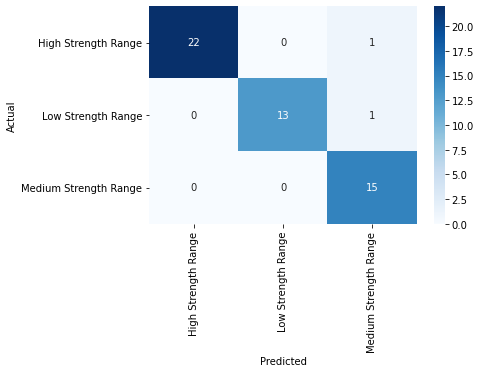

test accuracy : 96.15384615384616


In [38]:
import pandas as pd
import seaborn as sns
import tensorflow as tf

model = tf.keras.models.load_model('C:/Users/ASUS/Gray_Training/Ternary Classification/first_saved_model_2.h5')
filenames  = test_set.filenames
nb_samples = len(test_set)
y_prob = []
y_act = []

test_set.reset()
for _ in range(nb_samples):
    X_test, y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(y_test)
    
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob] 
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T, columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix , cmap = 'Blues' , annot = True , fmt = 'd')
plt.show()
print('test accuracy : {}'. format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [2]:
# Hexaclass Classification

img_height ,img_width = (224,224)
batch_size = 92

train_data_dir = "C:/Users/ASUS/Gray_Training/Hexaclass Classification/Training"
#valid_data_dir = "C:/Users/ASUS/Gray_Training/Binary Classification/validation"
test_data_dir = "C:/Users/ASUS/Gray_Training/Hexaclass Classification/Testing"

In [3]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split = 0)

train_generator = train_datagen.flow_from_directory(
     train_data_dir,
     target_size = (img_height,img_width),
     batch_size = batch_size,
     class_mode = 'categorical',
     subset = 'training')

#valid_generator(train_datagen.flow_from_directory(
     #valid_data_dir,
     #target_size = (img_height,img_width),
     #batch_size = batch_size,
     #class_mode = 'categorical',
     #subset = 'validation')
#)

Found 1183 images belonging to 6 classes.


In [4]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_height,img_width),
    batch_size = 1,
    class_mode = 'categorical',
    subset = 'training')


Found 285 images belonging to 6 classes.


In [5]:
X, y = test_generator.next()
X.shape

(1, 224, 224, 3)

In [6]:
inception_arch = InceptionResNetV2(input_shape = (img_height ,img_width , 3) , weights = 'imagenet', include_top = False)

In [7]:
for layer in inception_arch.layers:
    layer.trainable = False

In [9]:
base_model = InceptionResNetV2(include_top = False, weights = 'imagenet')
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dense(1024, activation = 'relu')(X)
predictions = Dense(train_generator.num_classes , activation = 'softmax')(X)
model = Model(inputs = base_model.input , outputs = predictions)


for layer in base_model.layers:
    layer.trainable = False
    
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  
r = model.fit(train_generator, epochs = 10)


Epoch 1/10
69/69 [==============================] - 33s 374ms/step - loss: 1.7472 - accuracy: 0.4457
Epoch 2/10
69/69 [==============================] - 27s 387ms/step - loss: 0.6875 - accuracy: 0.7713
Epoch 3/10
69/69 [==============================] - 29s 414ms/step - loss: 0.5601 - accuracy: 0.8211
Epoch 4/10
69/69 [==============================] - 28s 403ms/step - loss: 0.5166 - accuracy: 0.8270
Epoch 5/10
69/69 [==============================] - 28s 400ms/step - loss: 0.4875 - accuracy: 0.8094
Epoch 6/10
69/69 [==============================] - 28s 399ms/step - loss: 0.3908 - accuracy: 0.8768
Epoch 7/10
69/69 [==============================] - 28s 401ms/step - loss: 0.2857 - accuracy: 0.8856
Epoch 8/10
69/69 [==============================] - 28s 401ms/step - loss: 0.2740 - accuracy: 0.9120
Epoch 9/10
69/69 [==============================] - 29s 415ms/step - loss: 0.2923 - accuracy: 0.8827
Epoch 10/10
69/69 [==============================] - 28s 403ms/step - loss: 0.4154 - accura

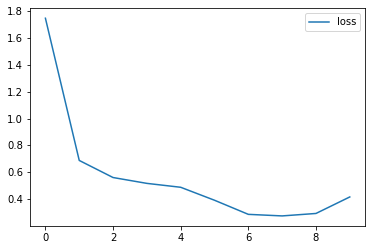

In [10]:
plt.plot(r.history['loss'], label = 'loss')
#plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [11]:
model.save('C:/Users/ASUS/Gray_Training/Hexaclass Classification/first_saved_model_2.h5')

1/1 [==============================] - 0s 115ms/step


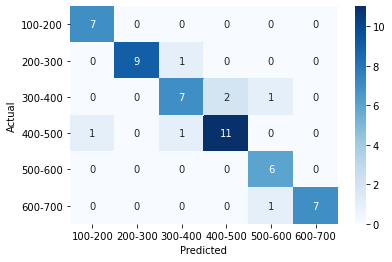

test accuracy : 87.03703703703704


In [12]:
import pandas as pd
import seaborn as sns
import tensorflow as tf

model = tf.keras.models.load_model('C:/Users/ASUS/Gray_Training/Hexaclass Classification/first_saved_model_2.h5')
filenames  = test_generator.filenames
nb_samples = len(test_generator)
y_prob = []
y_act = []

test_generator.reset()
for _ in range(nb_samples):
    X_test, y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(y_test)
    
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob] 
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T, columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix , cmap = 'Blues' , annot = True , fmt = 'd')
plt.show()
print('test accuracy : {}'. format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))



In [2]:
# Xception
# Binary Classification

img_height ,img_width = (224,224)
batch_size = 92

train_data_dir = "C:/Users/ASUS/Gray_Training/Binary Classification/Training"
valid_data_dir = "C:/Users/ASUS/Gray_Training/Binary Classification/validation"
test_data_dir = "C:/Users/ASUS/Gray_Training/Binary Classification/Testing"

In [3]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split = 0)
train_set = train_datagen.flow_from_directory(
     train_data_dir,
     target_size = (img_height,img_width),
     batch_size = batch_size,
     class_mode = 'categorical',
     subset = 'training')

#valid_generator(train_datagen.flow_from_directory(
     #valid_data_dir,
     #target_size = (img_height,img_width),
     #batch_size = batch_size,
     #class_mode = 'categorical',
     #subset = 'validation')
#)

Found 909 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1/255)

test_set = test_datagen.flow_from_directory(
            test_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'categorical')

Found 148 images belonging to 2 classes.


In [5]:
valid_datagen = ImageDataGenerator(rescale = 1/255)

valid_set = valid_datagen.flow_from_directory(
            valid_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'categorical')

Found 184 images belonging to 2 classes.


In [6]:
X, y = train_set.next()
X.shape

(92, 224, 224, 3)

In [7]:
Xception_arch = Xception(input_shape = (img_height ,img_width , 3) , weights = 'imagenet', include_top = False)
for layer in Xception_arch.layers:
    layer.trainable = False
X = Xception_arch.output
X = Flatten()(X)
X = Dense(512,
          kernel_regularizer=regularizers.L1L2(l1=0.0003, l2=1e-3),
          bias_regularizer=regularizers.L2(1e-2),
          activity_regularizer=regularizers.L2(1e-3),
          activation = 'relu')(X)
X = Dense(512,
          kernel_regularizer=regularizers.L1L2(l1=0.0003, l2=1e-3),
          bias_regularizer=regularizers.L2(1e-2),
          activity_regularizer=regularizers.L2(1e-3),
          activation = 'relu')(X)

predictions = Dense(train_set.num_classes , activation = 'softmax')(X)
model = Model(inputs = Xception_arch.input , outputs = predictions)
model.summary()


model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  
r = model.fit(train_set, validation_data = valid_set , epochs = 30)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

10/10 [==============================] - 84s 9s/step - loss: 3.7432 - accuracy: 0.9516 - val_loss: 3.7353 - val_accuracy: 0.9457
Epoch 11/30
10/10 [==============================] - 87s 9s/step - loss: 3.5961 - accuracy: 0.9670 - val_loss: 3.6265 - val_accuracy: 0.9076
Epoch 12/30
10/10 [==============================] - 85s 9s/step - loss: 3.5097 - accuracy: 0.9758 - val_loss: 3.5424 - val_accuracy: 0.9402
Epoch 13/30
10/10 [==============================] - 85s 9s/step - loss: 3.3424 - accuracy: 0.9692 - val_loss: 3.3660 - val_accuracy: 0.8859
Epoch 14/30
10/10 [==============================] - 85s 9s/step - loss: 3.5864 - accuracy: 0.9571 - val_loss: 3.6038 - val_accuracy: 0.9185
Epoch 15/30
10/10 [==============================] - 85s 9s/step - loss: 3.3922 - accuracy: 0.9769 - val_loss: 3.2023 - val_accuracy: 0.9457
Epoch 16/30
10/10 [==============================] - 86s 9s/step - loss: 3.0844 - accuracy: 0.9813 - val_loss: 3.0390 - val_accuracy: 0.9620
Epoch 17/30
10/10 [======

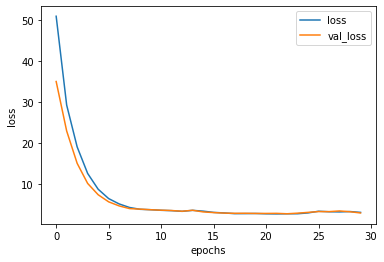

In [8]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

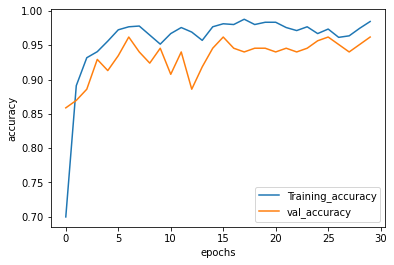

In [9]:
plt.plot(r.history['accuracy'], label = 'Training_accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [10]:
model.save('C:/Users/ASUS/Gray_Training/Binary Classification/first_saved_model_Xcep_t.h5')

In [11]:
test_loss, test_acc = model.evaluate(test_set)
print('\nTest Accuracy:' , test_acc)

148/148 [==============================] - 23s 154ms/step - loss: 2.9526 - accuracy: 0.9459

Test Accuracy: 0.9459459185600281


1/1 [==============================] - 0s 103ms/step


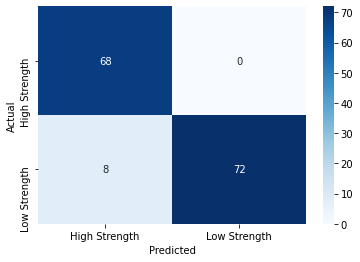

test accuracy : 94.5945945945946


In [12]:
import pandas as pd
import seaborn as sns
import tensorflow as tf

model = tf.keras.models.load_model('C:/Users/ASUS/Gray_Training/Binary Classification/first_saved_model_Xcep_t.h5')
filenames  = test_set.filenames
nb_samples = len(test_set)
y_prob = []
y_act = []

test_set.reset()
for _ in range(nb_samples):
    X_test, y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(y_test)
    
predicted_class = [list(train_set.class_indices.keys())[i.argmax()] for i in y_prob] 
actual_class = [list(train_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T, columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix , cmap = 'Blues' , annot = True , fmt = 'd')
plt.show()
print('test accuracy : {}'. format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
import pickle
from keras.applications import Xception
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score , f1_score , recall_score

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input


In [3]:
# ternary Classification

img_height ,img_width = (224,224)
batch_size = 64


train_data_dir = "C:/Users/ASUS/Gray_Training/Ternary Classification/Training"
valid_data_dir = "C:/Users/ASUS/Gray_Training/Ternary Classification/validation"
test_data_dir = "C:/Users/ASUS/Gray_Training/Ternary Classification/Testing"

In [4]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split = 0)

train_set = train_datagen.flow_from_directory(
     train_data_dir,
     target_size = (img_height,img_width),
     batch_size = batch_size,
     class_mode = 'sparse',
     subset = 'training')

#valid_generator(train_datagen.flow_from_directory(
     #valid_data_dir,
     #target_size = (img_height,img_width),
     #batch_size = batch_size,
     #class_mode = 'categorical',
     #subset = 'validation')
#)

Found 1011 images belonging to 3 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1/255)

test_set = test_datagen.flow_from_directory(
            test_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'sparse')

Found 200 images belonging to 3 classes.


In [6]:
valid_datagen = ImageDataGenerator(rescale = 1/255)

valid_set = valid_datagen.flow_from_directory(
            valid_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'sparse')

Found 247 images belonging to 3 classes.


In [7]:
X, y = train_set.next()
X.shape

(64, 224, 224, 3)

In [9]:
Xception_arch = Xception(input_shape = (img_height ,img_width , 3) , weights = 'imagenet', include_top = False)
for layer in Xception_arch.layers:
    layer.trainable = False
X = Xception_arch.output
X = Flatten()(X)
X = Dense(1024,
          kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-3),
          bias_regularizer=regularizers.L2(1e-2),
          activity_regularizer=regularizers.L2(1e-3),
          activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(512,
          kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-3),
          bias_regularizer=regularizers.L2(1e-2),
          activity_regularizer=regularizers.L2(1e-3),
          activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(64,
          kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-3),
          bias_regularizer=regularizers.L2(1e-2),
          activity_regularizer=regularizers.L2(1e-3),
          activation = 'relu')(X)

predictions = Dense(train_set.num_classes , activation = 'softmax')(X)
model = Model(inputs = Xception_arch.input , outputs = predictions)
model.summary()


model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  
r = model.fit(train_set, validation_data = valid_set , epochs = 10)



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_19 (Add)                   (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_18[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_19[0][0]']                 
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_22 (A

Epoch 6/10
16/16 [==============================] - 133s 9s/step - loss: 5.3837 - accuracy: 0.9050 - val_loss: 5.0494 - val_accuracy: 0.9636
Epoch 7/10
16/16 [==============================] - 135s 9s/step - loss: 5.0110 - accuracy: 0.9159 - val_loss: 4.8436 - val_accuracy: 0.9352
Epoch 8/10
16/16 [==============================] - 133s 9s/step - loss: 4.6796 - accuracy: 0.8981 - val_loss: 4.6474 - val_accuracy: 0.9393
Epoch 9/10
16/16 [==============================] - 134s 9s/step - loss: 5.0902 - accuracy: 0.8961 - val_loss: 5.0827 - val_accuracy: 0.9474
Epoch 10/10
16/16 [==============================] - 133s 9s/step - loss: 5.5516 - accuracy: 0.9041 - val_loss: 5.4118 - val_accuracy: 0.9474


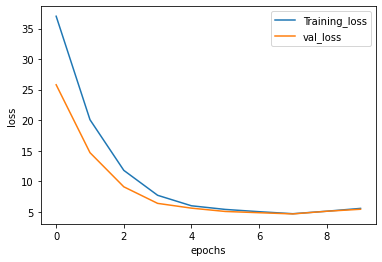

In [10]:
plt.plot(r.history['loss'], label = 'Training_loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

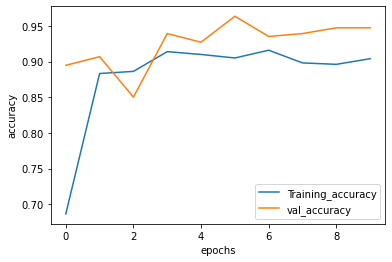

In [11]:
plt.plot(r.history['accuracy'], label = 'Training_accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [15]:
model.save('C:/Users/ASUS/Gray_Training/Ternary Classification/first_saved_model_Xcep_te.h5')

In [12]:
test_loss, test_acc = model.evaluate(test_set)
print('\nTest Accuracy:' , test_acc)

200/200 [==============================] - 49s 245ms/step - loss: 5.4838 - accuracy: 0.8850

Test Accuracy: 0.8849999904632568


1/1 [==============================] - 0s 108ms/step


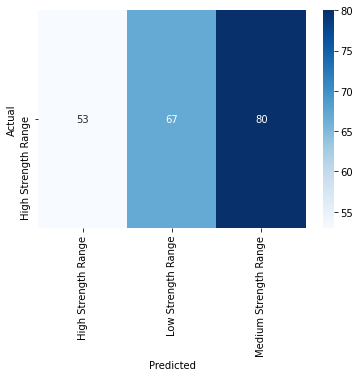

test accuracy : 26.5


In [16]:
import pandas as pd
import seaborn as sns
import tensorflow as tf

model = tf.keras.models.load_model('C:/Users/ASUS/Gray_Training/Ternary Classification/first_saved_model_Xcep_te.h5')
filenames  = test_set.filenames
nb_samples = len(test_set)
y_prob = []
y_act = []

test_set.reset()
for _ in range(nb_samples):
    X_test, y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(y_test)
    
predicted_class = [list(train_set.class_indices.keys())[i.argmax()] for i in y_prob] 
actual_class = [list(train_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T, columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix , cmap = 'Blues' , annot = True , fmt = 'd')
plt.show()
print('test accuracy : {}'. format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [17]:
from sklearn.metrics import roc_auc_score

s = []

for i in range (len (y_act)):
    k = (y_act[i])
    m = k[0]
    s.append(m)    

y_act_array = np.array(s)
y_act_array.shape

(200,)

In [19]:
y_prob_new = np.array(y_prob)
k = y_prob_new.reshape((200,3*1))
k.shape

(200, 3)

In [20]:
roc_auc_score(y_act_array,k,multi_class = 'ovr')

0.988682972012841

In [21]:
y_test = label_binarize(y_act_array, classes=np.unique(y_act_array))
n_classes = y_test.shape[1]
n_classes
y_test

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1,

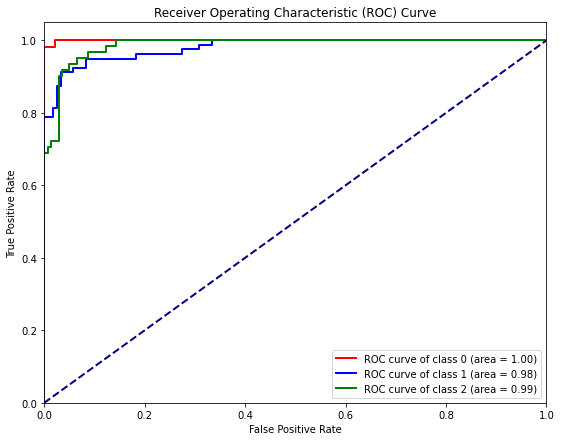

In [24]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_ = roc_curve(y_test[:, i], k[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
      

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), k.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize = (9,7))
lw = 2
colors = ['red', 'blue', 'green','yellow','purple','black']  # Add more colors if needed
for i in range(0,3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))
# Plot micro-average ROC curve
#plt.plot(fpr["micro"], tpr["micro"],
         #label='micro-average ROC curve (area = {0:0.2f})'
               #''.format(roc_auc["micro"]),
         #color='deeppink', linestyle=':', linewidth=4)

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
import pickle
from keras.applications import Xception
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score , f1_score , recall_score

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [2]:
# Hexaclass Classification

img_height ,img_width = (224,224)
batch_size = 92

train_data_dir = "C:/Users/ASUS/Gray_Training/Hexaclass Classification/Training"
valid_data_dir = "C:/Users/ASUS/Gray_Training/Hexaclass Classification/validation"
test_data_dir = "C:/Users/ASUS/Gray_Training/Hexaclass Classification/Testing"

In [3]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split = 0)

train_set = train_datagen.flow_from_directory(
     train_data_dir,
     target_size = (img_height,img_width),
     batch_size = batch_size,
     class_mode = 'sparse',
     subset = 'training')

Found 1183 images belonging to 6 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1/255)

test_set = test_datagen.flow_from_directory(
            test_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'sparse')

Found 285 images belonging to 6 classes.


In [5]:
valid_datagen = ImageDataGenerator(rescale = 1/255)

valid_set = valid_datagen.flow_from_directory(
            valid_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'sparse')

Found 176 images belonging to 6 classes.


In [6]:
X, y = train_set.next()
X.shape
y.shape

(92,)

In [7]:
Xception_arch = Xception(input_shape = (img_height ,img_width , 3) , weights = 'imagenet', include_top = False)
for layer in Xception_arch.layers:
    layer.trainable = False
X = Xception_arch.output
X = Flatten()(X)
X = Dense(2048,
          kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-4),
          bias_regularizer=regularizers.L2(1e-4),
          activity_regularizer=regularizers.L2(1e-4),
          activation = 'relu')(X)
X = Dropout(0.01)(X)
X = Dense(2048,
          kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-4),
          bias_regularizer=regularizers.L2(1e-4),
          activity_regularizer=regularizers.L2(1e-4),
          activation = 'relu')(X)
X = Dropout(0.01)(X)
X = Dense(1024,
          kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-4),
          bias_regularizer=regularizers.L2(1e-4),
          activity_regularizer=regularizers.L2(1e-4),
          activation = 'relu')(X)

predictions = Dense(train_set.num_classes , activation = 'softmax')(X)
model = Model(inputs = Xception_arch.input , outputs = predictions)
model.summary()


model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  
r = model.fit(train_set, validation_data = valid_set , epochs = 10)



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

UnknownError: Graph execution error:

OSError: unrecognized data stream contents when reading image file
Traceback (most recent call last):

  File "C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 270, in __call__
    ret = func(*args)

  File "C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1030, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 831, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 957, in generator_fn
    yield x[i]

  File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\preprocessing\image.py", line 110, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\preprocessing\image.py", line 337, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "C:\Users\ASUS\anaconda3\lib\site-packages\keras\utils\image_utils.py", line 443, in load_img
    img = img.resize(width_height_tuple, resample)

  File "C:\Users\ASUS\anaconda3\lib\site-packages\PIL\Image.py", line 1924, in resize
    self.load()

  File "C:\Users\ASUS\anaconda3\lib\site-packages\PIL\ImageFile.py", line 274, in load
    raise_oserror(err_code)

  File "C:\Users\ASUS\anaconda3\lib\site-packages\PIL\ImageFile.py", line 67, in raise_oserror
    raise OSError(message + " when reading image file")

OSError: unrecognized data stream contents when reading image file


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_7793]

In [8]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()

NameError: name 'r' is not defined

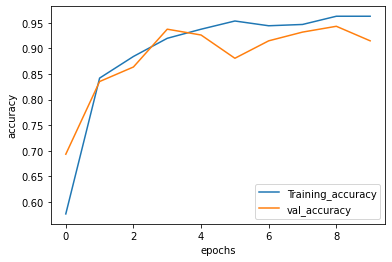

In [9]:
plt.plot(r.history['accuracy'], label = 'Training_accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [11]:
test_loss, test_acc = model.evaluate(test_set)
print('\nTest Accuracy:' , test_acc)

285/285 [==============================] - 130s 457ms/step - loss: 7.2253 - accuracy: 0.9123

Test Accuracy: 0.9122806787490845


1/1 [==============================] - 0s 141ms/step


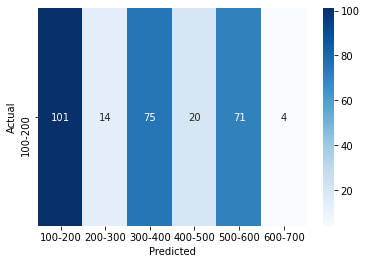

test accuracy : 35.43859649122807


In [12]:
import pandas as pd
import seaborn as sns
import tensorflow as tf

model = tf.keras.models.load_model('C:/Users/ASUS/Gray_Training/Hexaclass Classification/first_saved_model_hex.h8')
filenames  = test_set.filenames
nb_samples = len(test_set)
y_prob = []
y_act = []

test_set.reset()
for _ in range(nb_samples):
    X_test, y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(y_test)
    
predicted_class = [list(train_set.class_indices.keys())[i.argmax()] for i in y_prob] 
actual_class = [list(train_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T, columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix , cmap = 'Blues' , annot = True , fmt = 'd')
plt.show()
print('test accuracy : {}'. format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

from keras.applications import VGG16



In [13]:
from sklearn.metrics import roc_auc_score

s = []

for i in range (len (y_act)):
    k = (y_act[i])
    m = k[0]
    s.append(m)    

y_act_array = np.array(s)
y_act_array.shape

In [16]:
y_prob_new = np.array(y_prob)
k = y_prob_new.reshape((285,6*1))
k.shape

(285, 6)

In [26]:
roc_auc_score(y_act_array,k,multi_class = 'ovr')

0.9915330684433216

In [27]:
y_test = label_binarize(y_act_array, classes=np.unique(y_act_array))
n_classes = y_test.shape[1]
n_classes
y_test

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [28]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_ = roc_curve(y_test[:, i], k[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
      

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), k.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize = (9,7))
lw = 2
colors = ['red', 'blue', 'green','yellow','purple','black']  # Add more colors if needed
for i in range(0,6):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))
# Plot micro-average ROC curve
#plt.plot(fpr["micro"], tpr["micro"],
         #label='micro-average ROC curve (area = {0:0.2f})'
               #''.format(roc_auc["micro"]),
         #color='deeppink', linestyle=':', linewidth=4)

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
import pickle
from keras.applications import Xception
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score , f1_score , recall_score

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [2]:
# Xception
# Binary Classification

img_height ,img_width = (224,224)
batch_size = 92

train_data_dir = "C:/Users/ASUS/Gray_Training/Binary Classification/Training"
valid_data_dir = "C:/Users/ASUS/Gray_Training/Binary Classification/validation"
test_data_dir = "C:/Users/ASUS/Gray_Training/Binary Classification/Testing"

In [3]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split = 0)

train_set = train_datagen.flow_from_directory(
     train_data_dir,
     target_size = (img_height,img_width),
     batch_size = batch_size,
     class_mode = 'sparse',
     subset = 'training')

Found 909 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1/255)

test_set = test_datagen.flow_from_directory(
            test_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'sparse')

Found 148 images belonging to 2 classes.


In [5]:
valid_datagen = ImageDataGenerator(rescale = 1/255)

valid_set = valid_datagen.flow_from_directory(
            valid_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'sparse')

Found 184 images belonging to 2 classes.


In [6]:
X, y = train_set.next()
X.shape
y.shape

(92,)

In [8]:
Xception_arch = Xception(input_shape = (img_height ,img_width , 3) , weights = 'imagenet', include_top = False)
for layer in Xception_arch.layers:
    layer.trainable = False
X = Xception_arch.output
X = Flatten()(X)
X = Dense(512,
          kernel_regularizer=regularizers.L1L2(l1=0.0003, l2=1e-3),
          bias_regularizer=regularizers.L2(1e-2),
          activity_regularizer=regularizers.L2(1e-3),
          activation = 'relu')(X)
X = Dense(512,
          kernel_regularizer=regularizers.L1L2(l1=0.0003, l2=1e-3),
          bias_regularizer=regularizers.L2(1e-2),
          activity_regularizer=regularizers.L2(1e-3),
          activation = 'relu')(X)

predictions = Dense(train_set.num_classes , activation = 'softmax')(X)
model = Model(inputs = Xception_arch.input , outputs = predictions)
model.summary()


model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  
r = model.fit(train_set, validation_data = valid_set , epochs = 10)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_19 (Add)                   (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_18[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_19[0][0]']                 
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_22 (A

10/10 [==============================] - 88s 9s/step - loss: 3.8451 - accuracy: 0.9714 - val_loss: 3.6884 - val_accuracy: 0.9239


In [9]:
model.save('C:/Users/ASUS/Gray_Training/Binary Classification/first_saved_model_bin.h5')

In [10]:
test_loss, test_acc = model.evaluate(test_set)
print('\nTest Accuracy:' , test_acc)

148/148 [==============================] - 24s 161ms/step - loss: 3.7516 - accuracy: 0.8986

Test Accuracy: 0.8986486196517944


1/1 [==============================] - 0s 123ms/step


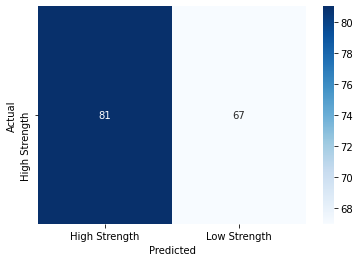

test accuracy : 54.729729729729726


In [11]:
import pandas as pd
import seaborn as sns
import tensorflow as tf

model = tf.keras.models.load_model('C:/Users/ASUS/Gray_Training/Binary Classification/first_saved_model_bin.h5')
filenames  = test_set.filenames
nb_samples = len(test_set)
y_prob = []
y_act = []

test_set.reset()
for _ in range(nb_samples):
    X_test, y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(y_test)
    
predicted_class = [list(train_set.class_indices.keys())[i.argmax()] for i in y_prob] 
actual_class = [list(train_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T, columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix , cmap = 'Blues' , annot = True , fmt = 'd')
plt.show()
print('test accuracy : {}'. format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [29]:
from sklearn.metrics import roc_auc_score

s = []

for i in range (len (y_act)):
    k = (y_act[i])
    m = k[0]
    s.append(m)    

y_act_array = np.array(s)
y_act_array.shape
y_act_array

array([0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.], dtype=float32)

In [30]:
y_prob

[array([[0.9895223 , 0.01047774]], dtype=float32),
 array([[0.9038817 , 0.09611824]], dtype=float32),
 array([[0.9581053, 0.0418946]], dtype=float32),
 array([[0.00245711, 0.997543  ]], dtype=float32),
 array([[3.6773831e-04, 9.9963224e-01]], dtype=float32),
 array([[0.9971445 , 0.00285551]], dtype=float32),
 array([[0.03577325, 0.9642268 ]], dtype=float32),
 array([[0.02033394, 0.97966605]], dtype=float32),
 array([[0.03429734, 0.96570265]], dtype=float32),
 array([[0.01002091, 0.98997915]], dtype=float32),
 array([[0.9827461 , 0.01725383]], dtype=float32),
 array([[0.9779474 , 0.02205264]], dtype=float32),
 array([[0.03239297, 0.967607  ]], dtype=float32),
 array([[0.8170279 , 0.18297206]], dtype=float32),
 array([[0.9775909 , 0.02240903]], dtype=float32),
 array([[0.7942937 , 0.20570631]], dtype=float32),
 array([[0.9829065 , 0.01709346]], dtype=float32),
 array([[0.98683655, 0.01316341]], dtype=float32),
 array([[0.9809874 , 0.01901255]], dtype=float32),
 array([[0.39238504, 0.6076

In [21]:
len(y_prob)

148

In [33]:
y_prob_new = np.array(y_prob)
k = y_prob_new.reshape((148,2*1))
k.shape
y_prob_new

array([[[9.89522278e-01, 1.04777385e-02]],

       [[9.03881729e-01, 9.61182415e-02]],

       [[9.58105326e-01, 4.18945998e-02]],

       [[2.45710509e-03, 9.97542977e-01]],

       [[3.67738307e-04, 9.99632239e-01]],

       [[9.97144520e-01, 2.85551022e-03]],

       [[3.57732549e-02, 9.64226782e-01]],

       [[2.03339402e-02, 9.79666054e-01]],

       [[3.42973433e-02, 9.65702653e-01]],

       [[1.00209108e-02, 9.89979148e-01]],

       [[9.82746124e-01, 1.72538254e-02]],

       [[9.77947414e-01, 2.20526438e-02]],

       [[3.23929749e-02, 9.67607021e-01]],

       [[8.17027926e-01, 1.82972059e-01]],

       [[9.77590919e-01, 2.24090330e-02]],

       [[7.94293702e-01, 2.05706313e-01]],

       [[9.82906520e-01, 1.70934629e-02]],

       [[9.86836553e-01, 1.31634111e-02]],

       [[9.80987430e-01, 1.90125480e-02]],

       [[3.92385036e-01, 6.07614934e-01]],

       [[9.63194668e-01, 3.68053280e-02]],

       [[6.28129486e-03, 9.93718743e-01]],

       [[8.87080371e-01, 1.12919